## Cement Strength Prediction

### Data Description

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

- Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('../input/concrete-compressive-strength/Concrete Compressive Strength.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

**Looks like there are no missing values in the data, let's check missing values**

In [6]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

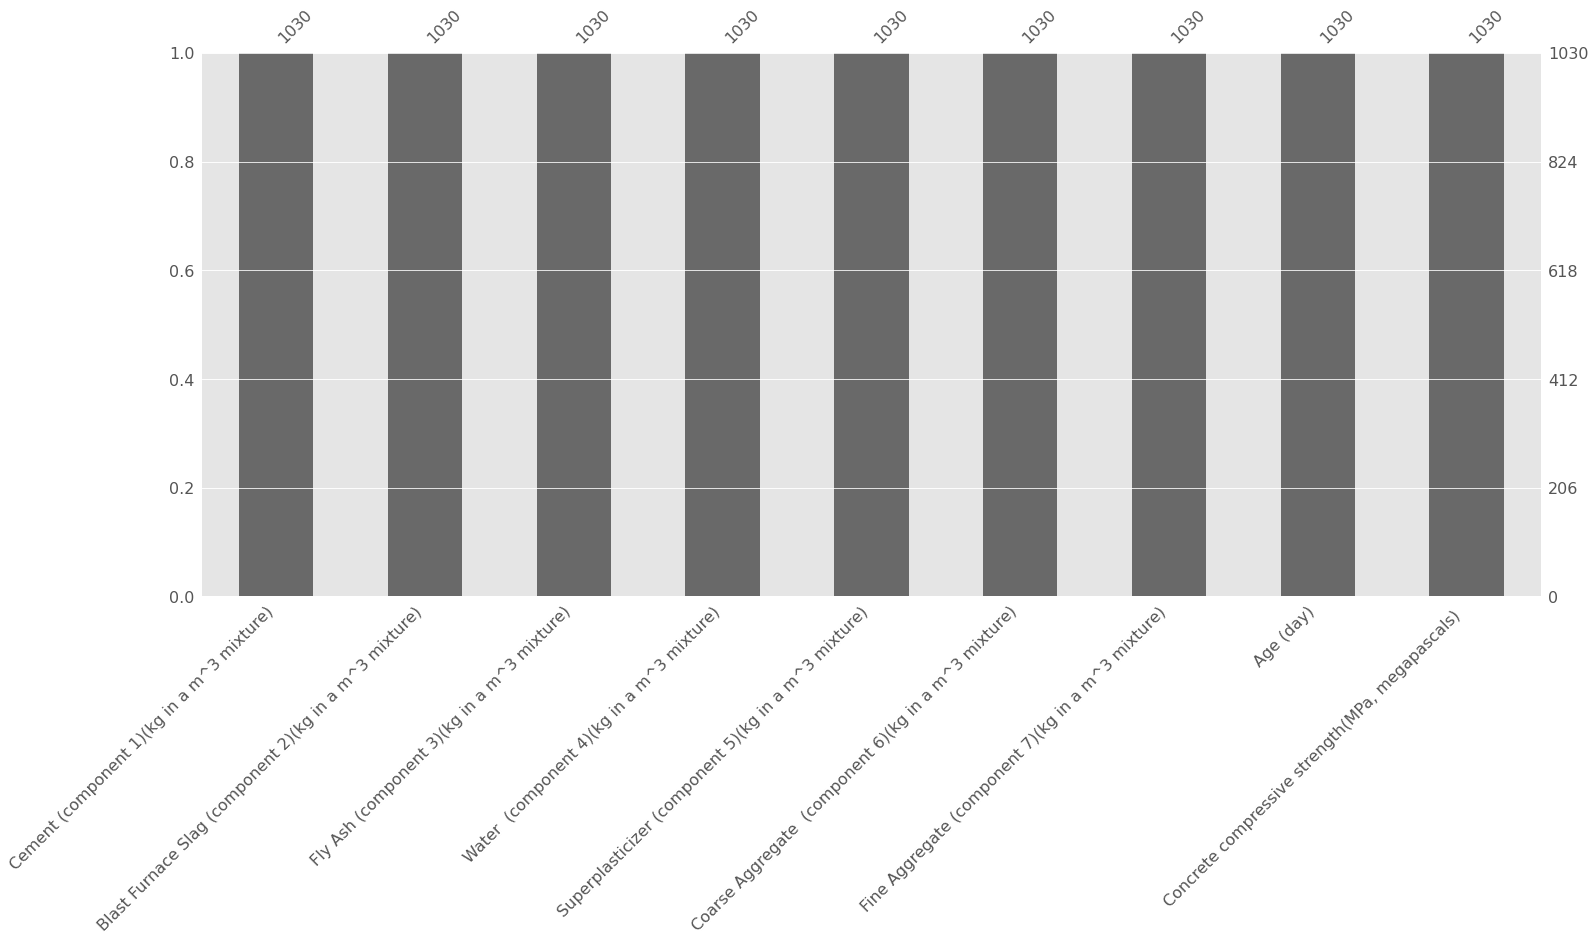

In [7]:
# visualizing missing values

msno.bar(df)
plt.show()

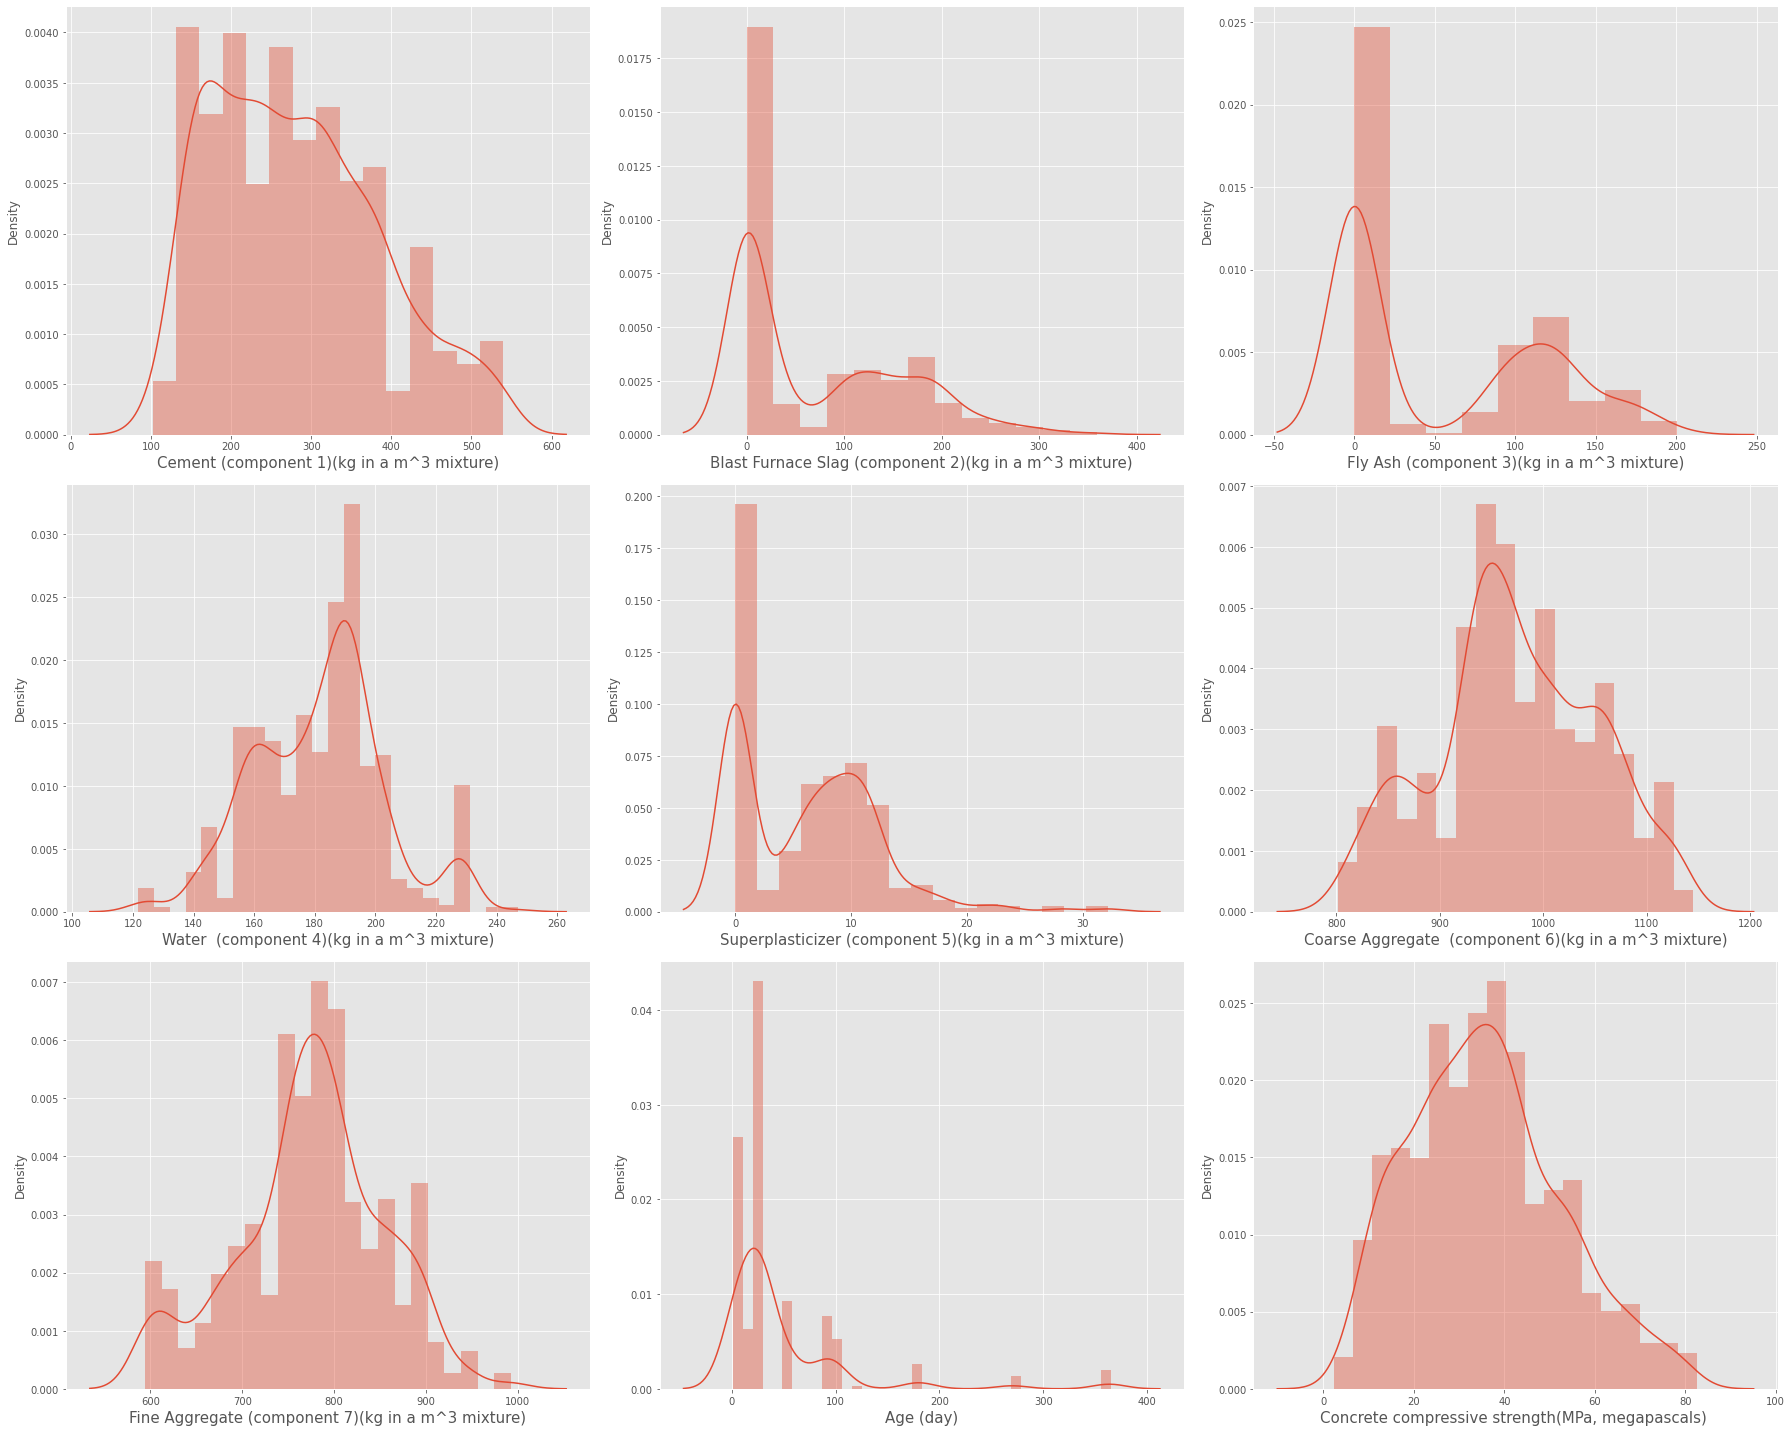

In [8]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [9]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X.var()

Cement (component 1)(kg in a m^3 mixture)                10921.742654
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     7444.083725
Fly Ash (component 3)(kg in a m^3 mixture)                4095.548093
Water  (component 4)(kg in a m^3 mixture)                  456.060245
Superplasticizer (component 5)(kg in a m^3 mixture)         35.682602
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      6045.656228
Fine Aggregate (component 7)(kg in a m^3 mixture)         6428.099159
Age (day)                                                 3990.437729
dtype: float64

In [11]:
# normalizing features
# let's add 1 to each value in everycolumn so that we don't get exception while calculating the log value of 0

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [12]:
X.var()

Cement (component 1)(kg in a m^3 mixture)                0.143939
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    5.816392
Fly Ash (component 3)(kg in a m^3 mixture)               5.641045
Water  (component 4)(kg in a m^3 mixture)                0.014066
Superplasticizer (component 5)(kg in a m^3 mixture)      1.333888
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.006475
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.011292
Age (day)                                                1.233057
dtype: float64

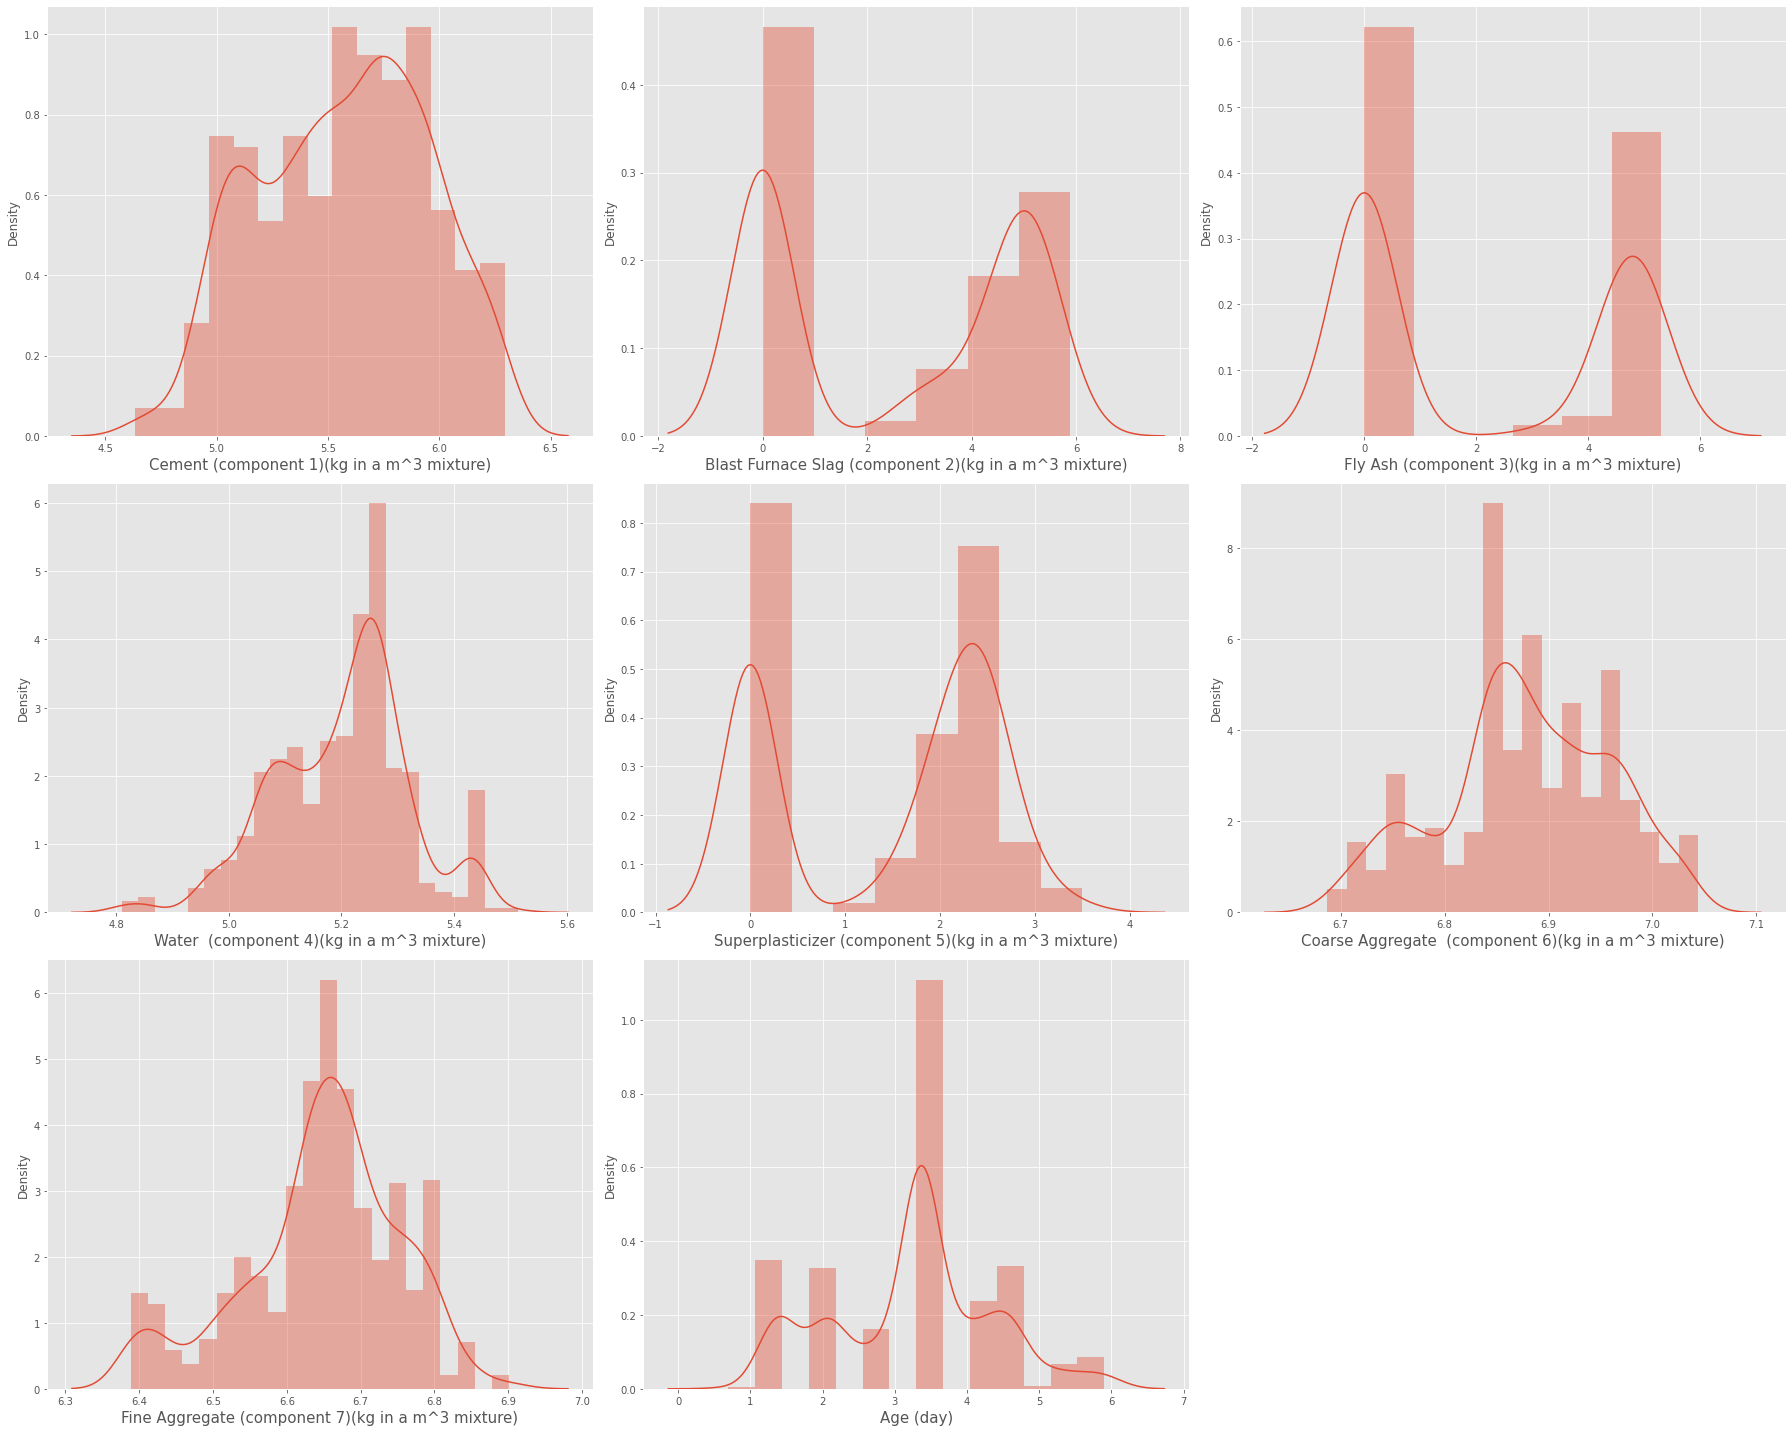

In [13]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Now data is normalized and looks good, let's check for outliers.

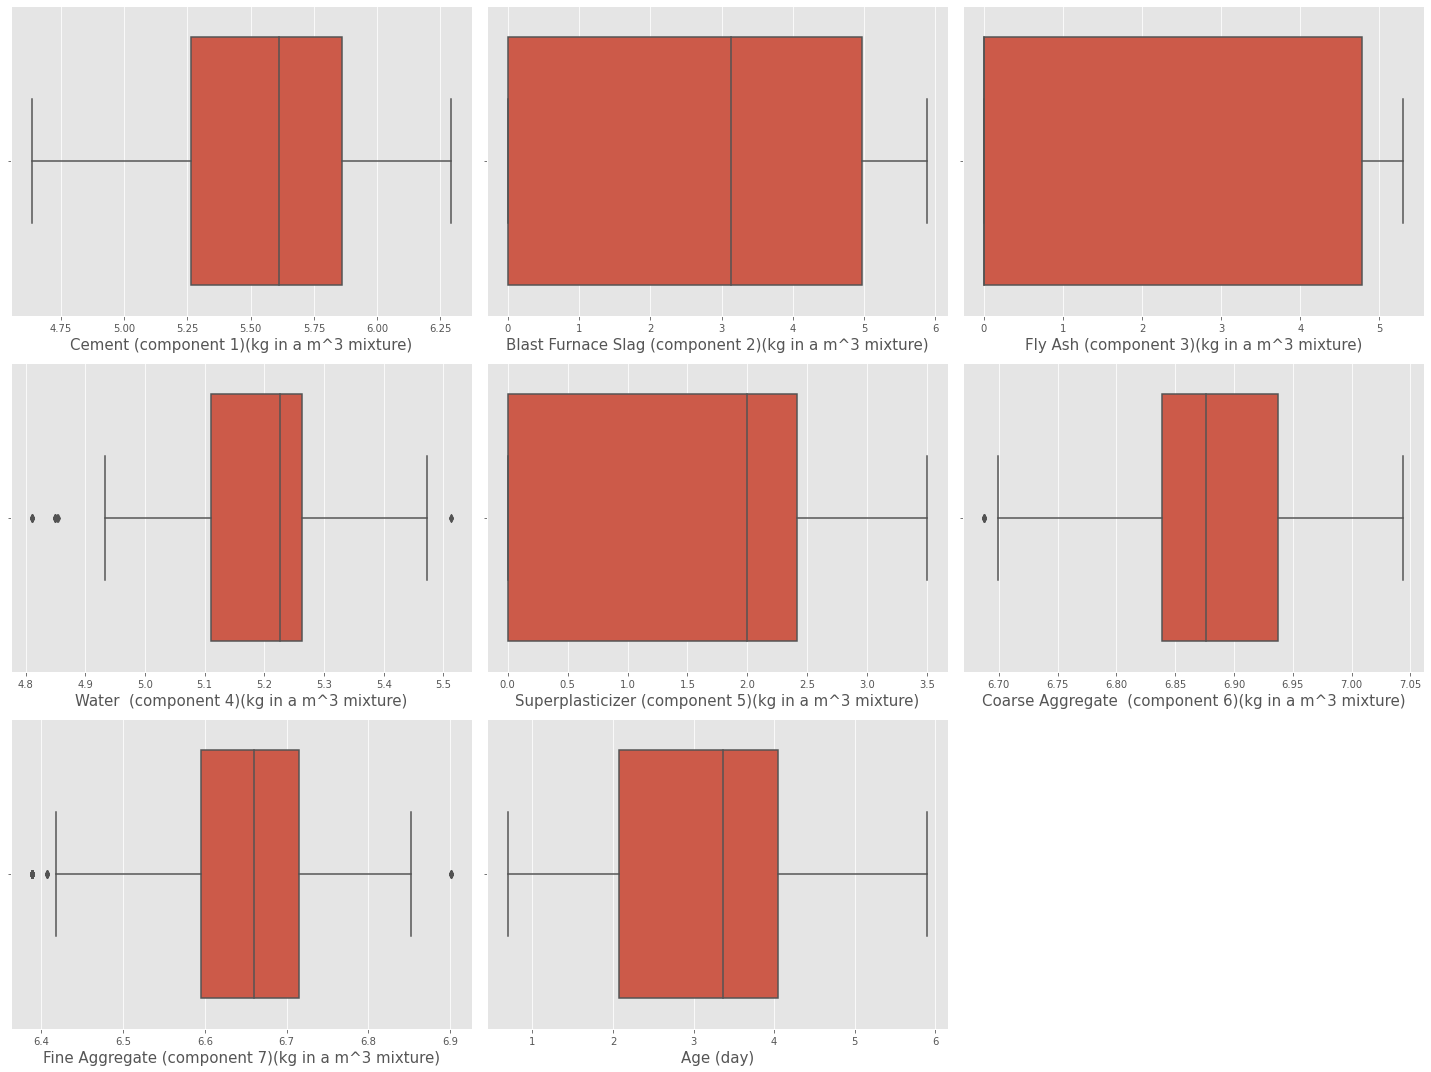

In [14]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

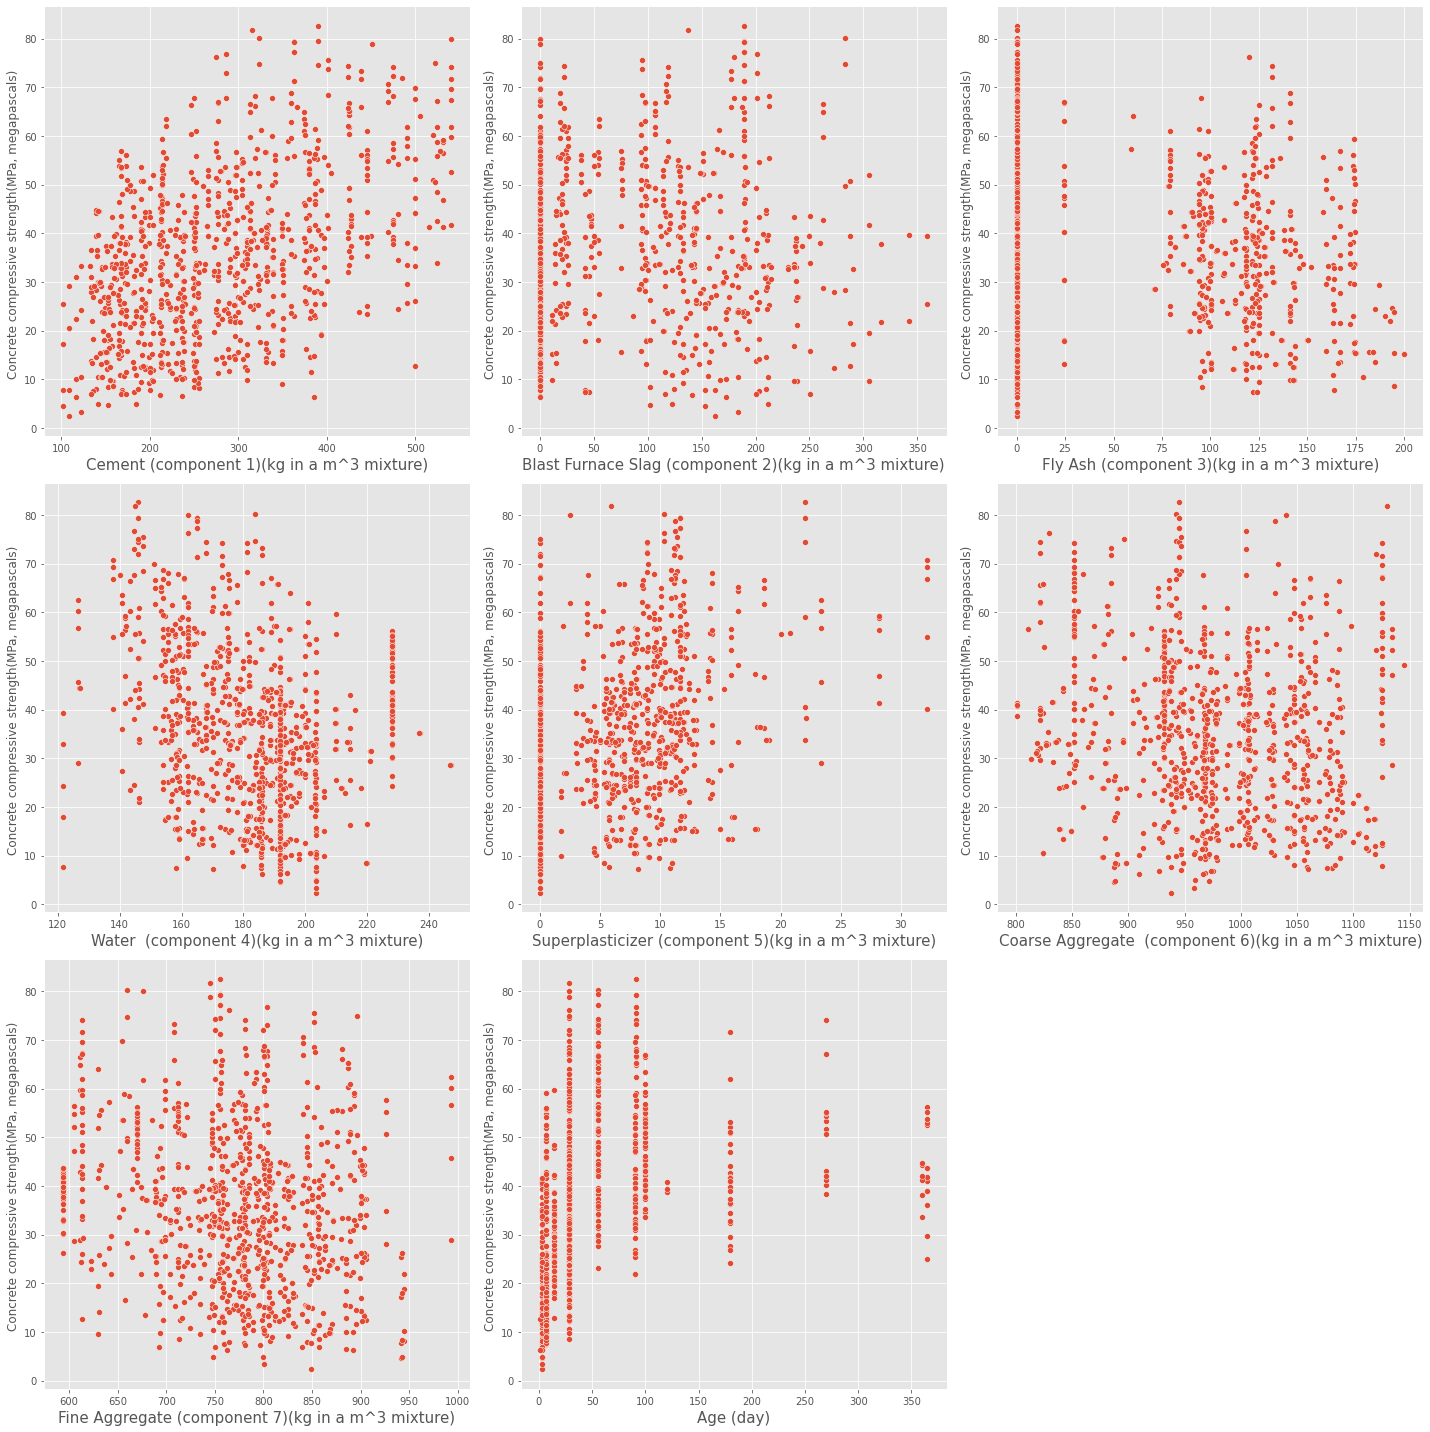

In [15]:
# let's check how our features are related to the target column

plt.figure(figsize = (20, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(df[col], y)
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

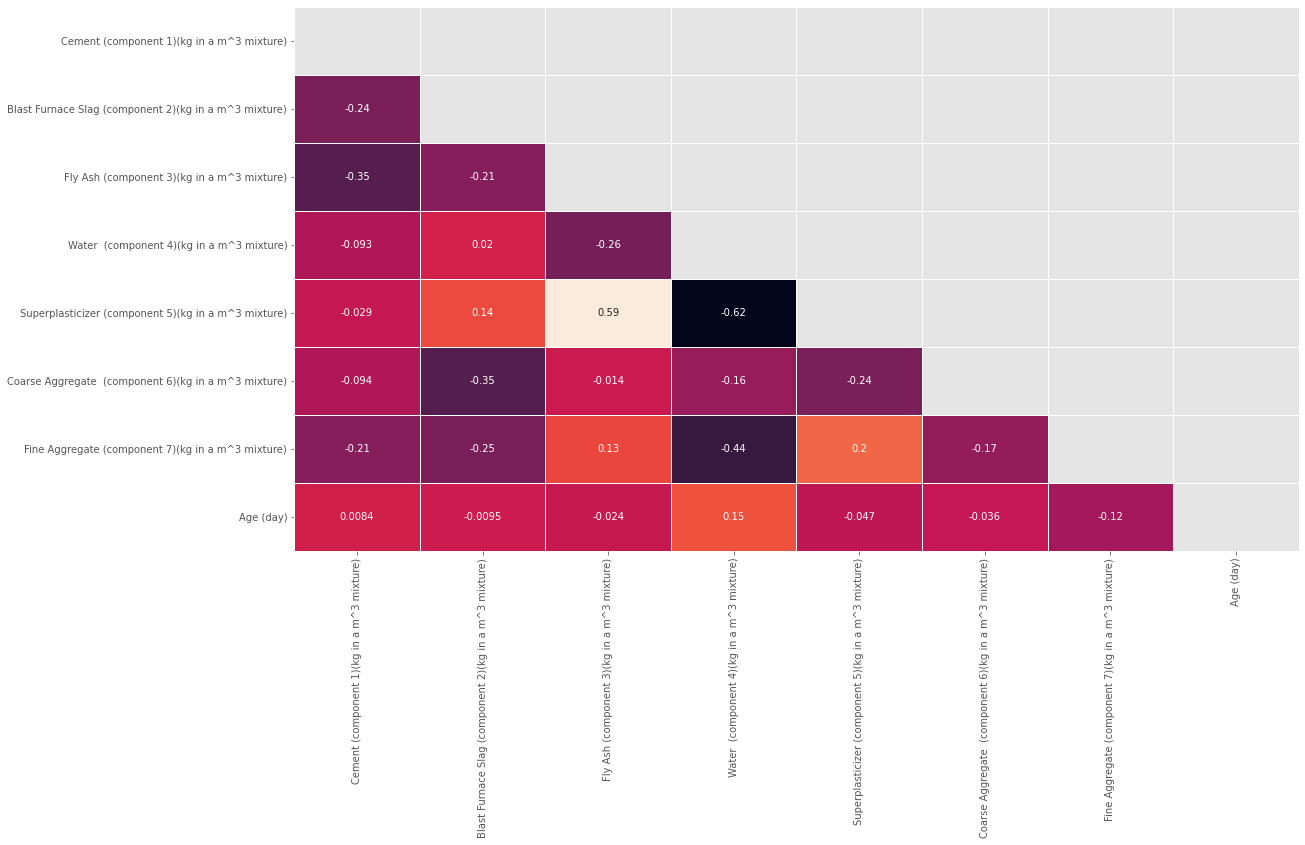

In [16]:
# checking for correlation using heatmap

plt.figure(figsize = (18, 10))

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

Great! None of column seem to be correlated.

In [17]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.score(X_train, y_train)

0.7982138218505475

In [21]:
lr.score(X_test, y_test)

0.814999798699567

### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso, LassoCV

In [23]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [24]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0033716461490126927)

In [25]:
lasso.score(X_train, y_train)

0.7982132416262571

In [26]:
lasso.score(X_test, y_test)

0.8150021936226173

### Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
dtr.score(X_train, y_train)

0.9999961729707556

In [29]:
dtr.score(X_test, y_test)

0.8052442347713333

In [30]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [31]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
0.8295444670934542


In [32]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [33]:
dtr.score(X_train, y_train)

0.953386215362858

In [34]:
dtr.score(X_test, y_test)

0.8279604506232385

### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
rfr.score(X_train, y_train)

0.9876991630392229

In [37]:
rfr.score(X_test, y_test)

0.9127032622340117

### Ada Boost 

In [38]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'))

In [39]:
ada.score(X_train, y_train)

0.9952871764886796

In [40]:
ada.score(X_test, y_test)

0.9122898274094078

In [41]:
# hyper parameter tuning 

grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                              max_depth=10,
                                                                              splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [42]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 80}
0.8916284548036929


In [43]:
ada = AdaBoostRegressor(base_estimator = dtr, learning_rate = 1, loss = 'exponential', n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'),
                  learning_rate=1, loss='exponential', n_estimators=100)

In [44]:
ada.score(X_train, y_train)

0.9959909079625919

In [45]:
ada.score(X_test, y_test)

0.9158644559829584

### Gradient Boost Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
gbr.score(X_train, y_train)

0.9504446027492408

In [48]:
gbr.score(X_test, y_test)

0.9019948323890707

In [49]:
# hyper parameter tuning of gradient boost regressor

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [50]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'ls', 'n_estimators': 200}
0.9051717223309469


In [51]:
gbr = GradientBoostingRegressor(learning_rate = 0.5, loss = 'ls', n_estimators = 200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)

In [52]:
gbr.score(X_train, y_train)

0.994923285390634

In [53]:
gbr.score(X_test, y_test)

0.9330910576647933

### XgBoost Regressor

In [54]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgb.score(X_train, y_train)

0.9993526173419847

In [56]:
xgb.score(X_test, y_test)

0.9338284890534514

### Voting Regressor

In [57]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=0.0033716461490126927)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse...
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=7, min_child_weight=1,
                                          missing=nan,
                                          monotone

In [58]:
vr.score(X_train, y_train)

0.9949444410907269

In [59]:
vr.score(X_test, y_test)

0.943603445962298

In [60]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), vr.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Voting Regressor,0.943603
6,XgBoost,0.933828
5,Gradient Boost,0.933091
4,Ada Boost,0.915864
3,Random Forest,0.912703
2,Decision Tree,0.827960
1,Lasso Regression,0.815002
0,Linear Regression,0.815000


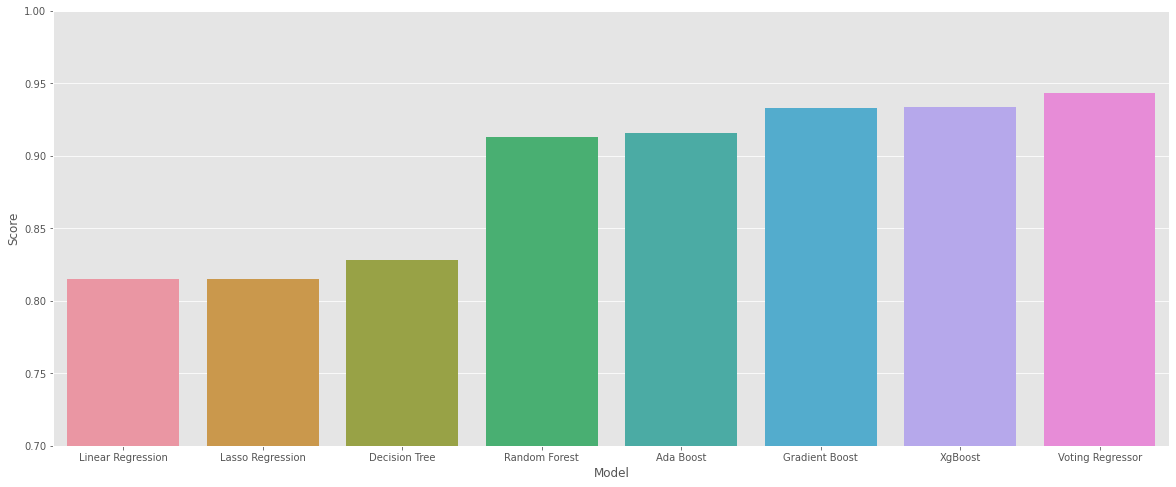

In [61]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.70, 1)
plt.show()


### Great we get accuracy above 90% which is quite good.

#### If you like this kernel, Please do upvote